<a href="https://colab.research.google.com/github/OscarAliM/4_Valores_Atipicos_DataFrame/blob/main/4_Valores_Atipicos_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Ventas_totales.csv')

In [ ]:
#Verificamos informacion del DataFrame
data.info()

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [ ]:
#Reemplazamos valores nulos del DataFrame con "bfill"
data1 =data.fillna(method="bfill")
data1

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data2=data.copy()
data2=data2.fillna(round(data.mean(),1)) 
data2

In [ ]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

<Figure size 1080x576 with 0 Axes>

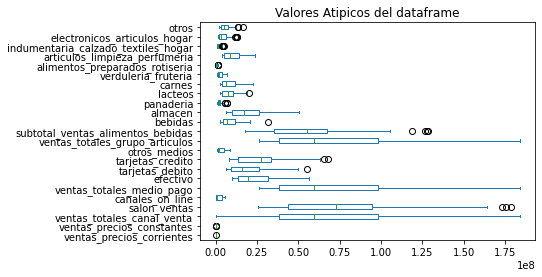

In [16]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize = (15, 8))
data2.plot(kind='box', vert=False)
plt.title("Valores Atipicos del dataframe")
plt.show() #dibujamos el histograma

**PROCEDIMIENTO "DESVIACION ESTANDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME **

In [ ]:
#Metodo aplicando desviacion estandar. Enceuntro los valores extremos
y=data2
Limite_Superior= y.mean() +3*y.std()
Limite_Inferior= y.mean() -3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Encontramos Ouliers del Dataframe
outliers=data2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenermos datos sin outliers del dataframe
data3=data2[(y<Limite_Superior)&(y>Limite_Inferior)]
data3

In [ ]:
#Eliminamos columnas innecesarias
data4=data3.drop(['indice_tiempo'], axis=1)
data4

In [ ]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data4.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data4.copy()
data_clean=data_clean.fillna(round(data4.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos del dataframe Limpio
valores_nulos=data_clean.isnull().sum()
valores_nulos

**PROCEDIMIENTO "CUANTILES" PARA ELIMINAR OTLIERS (SUSTITUIR) EN DATAFRAME**

In [ ]:
#Metodo aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite Superior Permitido", Limite_Superior_iqr)
print("Limite Inferior Permitido", Limite_Inferior_iqr)

In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del dataframe
data3_iqr= data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Eliminamos columnas innecesarias
data4_iqr= data3_iqr.drop(['indice_tiempo'], axis=1)
data4_iqr

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data4_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr

In [ ]:
# Unimos la columna 'indice_tiempo' con el dataframe

indice_tiempo=data2['indice_tiempo']
Datos_limpios = pd.concat([indice_tiempo, data5_iqr], axis=1)
Datos_limpios

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

In [45]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Datos_limpios.csv")

In [47]:
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("Datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>